In [19]:
import kagglehub
import shutil

paths_cats = [f"Petimages/Cat/{i}.jpg" for i in range(1000, 10301)]


for i in paths_cats:
    print(i)
    try:
        path = kagglehub.dataset_download(
            handle="bhavikjikadara/dog-and-cat-classification-dataset",
            path=i
        )
        
        shutil.move(path, "dataset/cat")
    except Exception as e:
        print("Error", e)
        pass


paths_dogs = [f"Petimages/Dog/{i}.jpg" for i in range(1000, 10301)]
for i in paths_dogs:
    print(i)
    try:
        path = kagglehub.dataset_download(
            handle="bhavikjikadara/dog-and-cat-classification-dataset",
            path=i
        )
        
        shutil.move(path, "dataset/dog")
    except:
        print("Error", e)
        pass

Petimages/Cat/1000.jpg


100%|██████████| 25.7k/25.7k [00:00<00:00, 122kB/s]


Petimages/Cat/1001.jpg


100%|██████████| 23.2k/23.2k [00:00<00:00, 126kB/s]


Petimages/Cat/1002.jpg


100%|██████████| 167k/167k [00:00<00:00, 244kB/s]


Petimages/Cat/1003.jpg


100%|██████████| 14.7k/14.7k [00:00<00:00, 335kB/s]

Petimages/Cat/1004.jpg


100%|██████████| 40.9k/40.9k [00:00<00:00, 136kB/s]


Petimages/Cat/1005.jpg
Error 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1
The server reported the following issues: Not found
Please make sure you specified the correct resource identifiers.
Petimages/Cat/1006.jpg
Error 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1
The server reported the following issues: Not found
Please make sure you specified the correct resource identifiers.
Petimages/Cat/1007.jpg
Error 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1
The server reported the following issues: Not found
Please make sure you specified the correct resource identifiers.
Petimages/Cat/1008.jpg
Error 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classificat

KeyboardInterrupt: 

In [21]:
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")
shutil.move(path, "dataset/full_dataset")

Resuming download from 1048576 bytes (811699561 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/bhavikjikadara/dog-and-cat-classification-dataset?dataset_version_number=1 (1048576/812748137) bytes left.


  1%|          | 8.00M/775M [00:23<43:30, 308kB/s]


KeyboardInterrupt: 

___

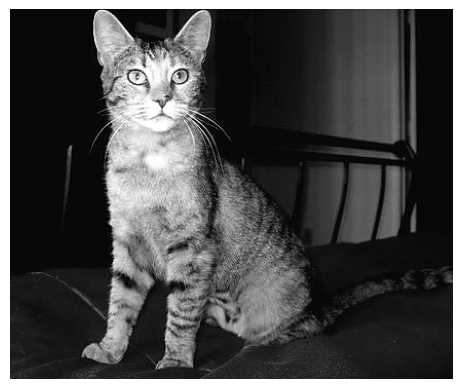

In [2]:
# Загружаем изображения из папки cat в виде черно-белых изображений
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

cat_dir = "dataset/cat"
cat_images = []

for filename in os.listdir(cat_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(cat_dir, filename)
        img = Image.open(img_path).convert("L")  # Преобразуем в черно-белое
        cat_images.append(np.array(img))

# Пример отображения одного изображения
plt.imshow(cat_images[0], cmap="gray")
plt.axis("off")
plt.show()

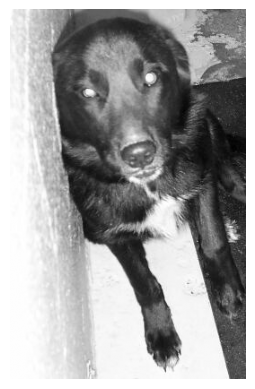

In [3]:
dog_dir = "dataset/dog"
dog_images = []

for filename in os.listdir(dog_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(dog_dir, filename)
        img = Image.open(img_path).convert("L")  # Преобразуем в черно-белое
        dog_images.append(np.array(img))

# Пример отображения одного изображения
plt.imshow(dog_images[0], cmap="gray")
plt.axis("off")
plt.show()

In [7]:
print(len(cat_images), len(dog_images))

41 41


In [8]:
# Приводим все изображения к одному размеру (например, 128x128)
cat_images_resized = [np.resize(img, (128, 128)) for img in cat_images]
dog_images_resized = [np.resize(img, (128, 128)) for img in dog_images]

# Добавляем к изображениям метки классов, cat - 0, dog - 1
cat_labels = [0] * len(cat_images_resized)
dog_labels = [1] * len(dog_images_resized)

images = np.array(cat_images_resized + dog_images_resized)
labels = np.array(cat_labels + dog_labels)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Преобразуем изображения в одномерные массивы
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

pipeline.fit(X_train_flat, y_train)

y_pred = pipeline.predict(X_test_flat)

print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         Cat       0.40      0.44      0.42         9
         Dog       0.29      0.25      0.27         8

    accuracy                           0.35        17
   macro avg       0.34      0.35      0.34        17
weighted avg       0.35      0.35      0.35        17

[[4 5]
 [6 2]]


In [16]:
from sklearn.decomposition import PCA


pipeline = make_pipeline(StandardScaler(), PCA(n_components=10), LogisticRegression(max_iter=1000))

pipeline.fit(X_train_flat, y_train)

y_pred = pipeline.predict(X_test_flat)

print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         Cat       0.67      0.44      0.53         9
         Dog       0.55      0.75      0.63         8

    accuracy                           0.59        17
   macro avg       0.61      0.60      0.58        17
weighted avg       0.61      0.59      0.58        17

[[4 5]
 [2 6]]


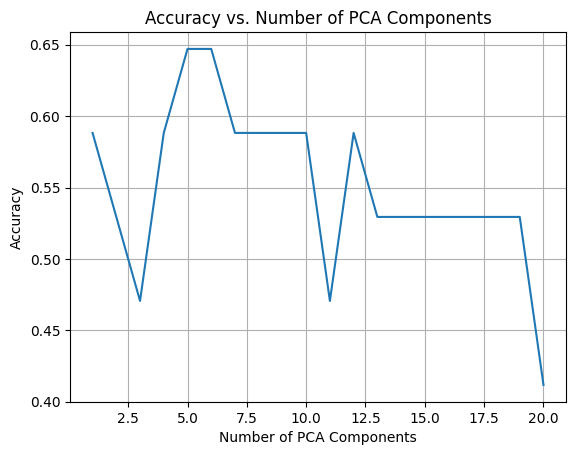

In [17]:
from sklearn.metrics import accuracy_score

components = range(1, 21)
accuracies = []

for n in components:
    pipeline = make_pipeline(StandardScaler(), PCA(n_components=n), LogisticRegression(max_iter=1000))
    pipeline.fit(X_train_flat, y_train)
    y_pred = pipeline.predict(X_test_flat)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(components, accuracies)
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of PCA Components")
plt.grid()
plt.show()